In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [5]:
'''
Data from: https://www.kaggle.com/competitions/titanic/data
'''
file_train = '../dataset/train.csv'
file_test = '../dataset/test.csv'
train_df = pd.read_csv(file_train, index_col='PassengerId')
test_df = pd.read_csv(file_test, index_col='PassengerId')

In [6]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


The dataset suffers from common dataset problems:
 - Missing values
 - Non-numeric columns (categorical data)
 - Not scaled values

In [7]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


When we train a machine learning algorithm we need to consider these decisions. Which data is really valuable as input?

We might be able to drop 'Name', 'Ticket' and Cabin columns.

Maybe with feature engineering we could extract lastName from name column. Some families could have more "influence" than others to survive. But again, as a demo, let's keep it simple.

Let's drop the columns.

In [8]:
train_df = train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1) # axis=1 means columns
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,NaN,1,2,23.4500,S


Pandas `isna()` function returns True (which is treated as 1 when used as a number) for NaN values, so we can just add them up for each column

In [9]:
train_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We can see in our case we have three columns with missing values. Age (numerical) and embarked (categorical).

How to fix it?

Some of the possible alternatives (there are more):

- Can we fill the missing data with some other information source?
- Drop rows with missing values
- Drop column with missing values
- Replace value with mean or median (or mode if it's categorical data)
- Train a neural network to predict missing values

In our case we will fill 'Age' with median and 'Embarked' with mode.

![title](../images/median.png)

In [10]:
age_median = train_df['Age'].median()
age_median

np.float64(28.0)

In [11]:
train_df['Age'] = train_df['Age'].fillna(age_median)

In [12]:
embarked_mode = train_df['Embarked'].mode().iloc[0]
embarked_mode

'S'

In [13]:
train_df['Embarked'] = train_df['Embarked'].fillna(embarked_mode)

Now we should not have empty values

In [14]:
train_df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

It's always important to understand your data. Data is the basis of the machine learning models, so let's have a quick look.

Remember, we want to predict Survivability, so let's start by asking some questions to data to see how other features impact survival

Let's check the correlation matrix for our variables

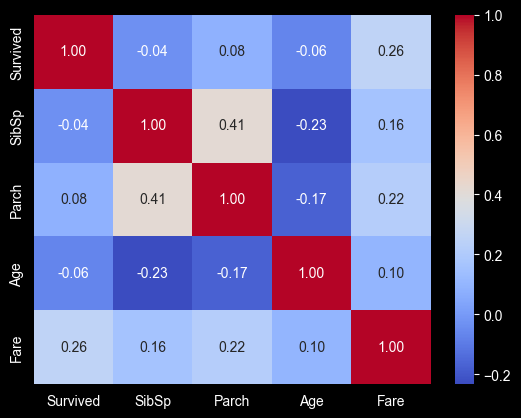

In [15]:
g = sns.heatmap(train_df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

How did gender affect survival?

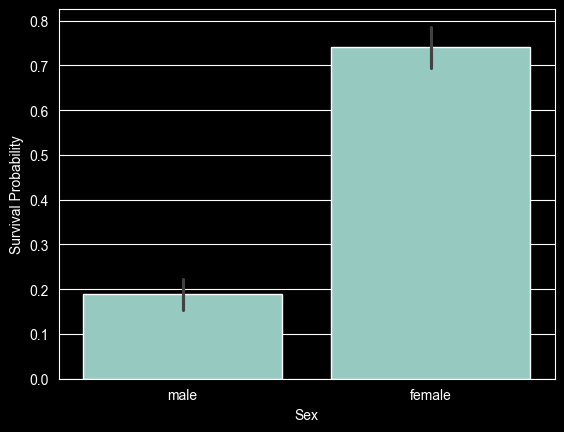

In [16]:
g = sns.barplot(x="Sex",y="Survived",data=train_df)
g = g.set_ylabel("Survival Probability")

Looks like we have passengers of 3 classes (from 1st class to 3rd class). How did this affect survival?

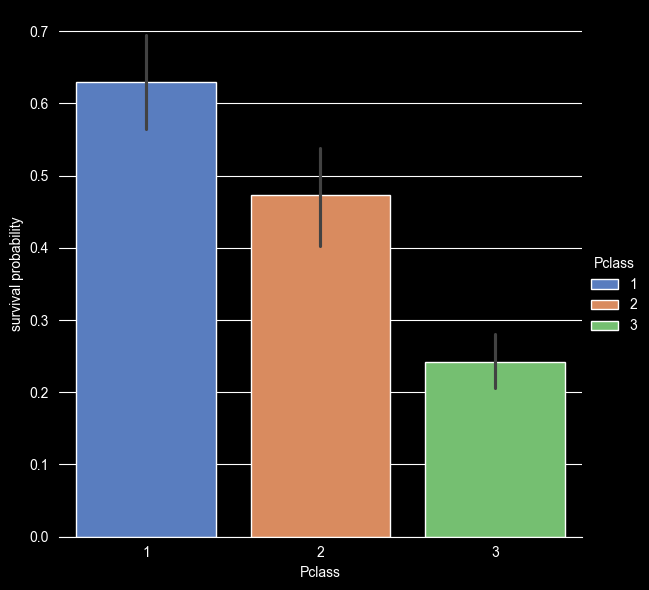

In [17]:
g = sns.catplot(
    x="Pclass",
    y="Survived",
    hue="Pclass",
    data=train_df,
    kind="bar",
    height=6,
    palette="muted"
)

g.despine(left=True)
g.set_ylabels("survival probability")

How did age affect survival?

(0.0, 1.0)

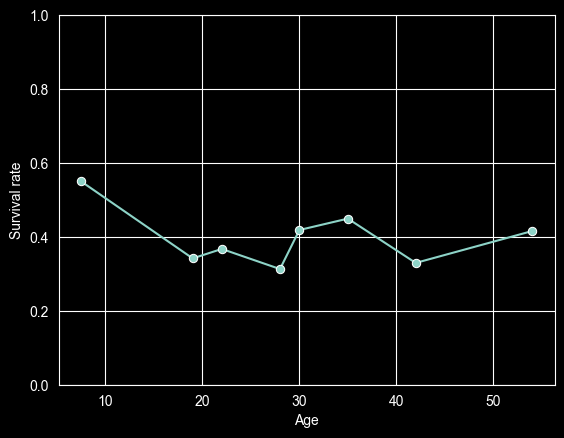

In [18]:
plot_df = (train_df.assign(age_bin=pd.qcut(train_df["Age"], 10, duplicates="drop"))
             .groupby("age_bin", observed=True)
             .agg(Age=("Age", "median"),
                  Survived=("Survived", "mean"))
             .reset_index())

ax = sns.lineplot(data=plot_df, x="Age", y="Survived", marker="o")
ax.set(xlabel="Age", ylabel="Survival rate")
ax.set_ylim(0, 1)

Sometimes part of the dataset does not follow a normal distribution. This can be seen in the Fare column, which has a high skewness.

Skewed means a distribution is not symmetric — the data is stretched more to one side.

This problem can impact negatively our training, as it can cause:

- Gradient imbalance: Large values dominate weight update (model pays disproportionate attention to expensive tickets)
- Activation saturation: Neural nets are sensitive to input scale. Skewed features → wide numeric range → neurons saturate
- Poor generalization: Network learns to fit rare extreme values instead of common patterns.

In this case you can see it's right (positive) skewed. Using logarithmic scale helps

Text(0, 0.5, 'Density')

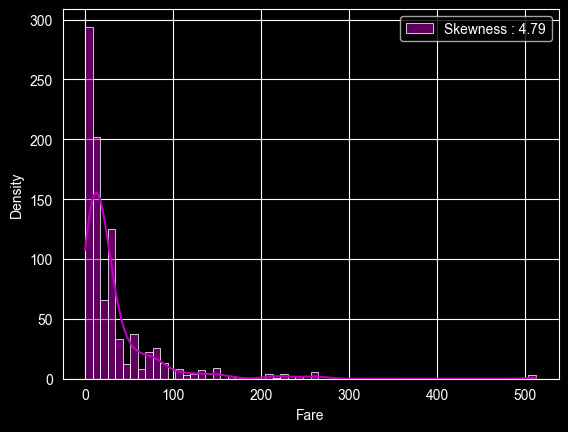

In [21]:
fare = train_df["Fare"]

g = sns.histplot(fare, kde=True, color="m",
                 label=f"Skewness : {fare.skew():.2f}")

g.legend(loc="best")
g.set_xlabel("Fare")
g.set_ylabel("Density")

![title](../images/skew.png)

(0.0, 1.0)

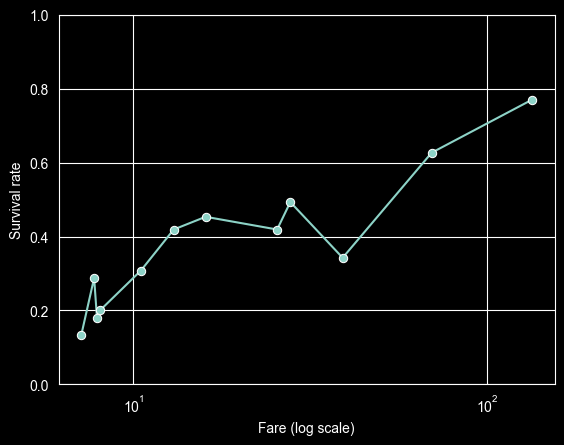

In [25]:
df = train_df[["Fare","Survived"]].dropna()
plot_df = (df.assign(bin=pd.qcut(df["Fare"], 12, duplicates="drop"))
             .groupby("bin", observed=True)
             .agg(Fare=("Fare","median"), Survived=("Survived","mean"))
             .reset_index())

ax = sns.lineplot(data=plot_df, x="Fare", y="Survived", marker="o")
ax.set_xscale("log")
ax.set(xlabel="Fare (log scale)", ylabel="Survival rate")
ax.set_ylim(0, 1)
#In this case we use logarithmic scale as fare data is skewed

We didn't finish yet preparing data. Machine learning algorithms usually work with numbers, and we have some categorical columns (Sex, Cabin, Embarked)

So we need to convert them to numbers.

For binary values like 'Sex', it's easy, we can just convert it to 0-1.

In [26]:
train_df["Sex"] = train_df["Sex"].map({"male": 0, "female": 1})
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,S
2,1,1,1,38.0,1,0,71.2833,C
3,1,3,1,26.0,0,0,7.9250,S
4,1,1,1,35.0,1,0,53.1000,S
5,0,3,0,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,S
888,1,1,1,19.0,0,0,30.0000,S
889,0,3,1,28.0,1,2,23.4500,S


For non-binary columns, one method that usually works properly is called 'one hot encoding'

![title](../images/onehotencoding.png)

In [27]:
categorical_cols = ["Embarked"]
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore") #Provided by sklearn

# Fit + transform
encoded_array = encoder.fit_transform(train_df[categorical_cols])

# Convert to DataFrame with proper column names
encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=train_df.index
)

# Drop original categorical columns
train_df = train_df.drop(columns=categorical_cols)

# Concatenate back to original dataframe
train_df = pd.concat([train_df, encoded_df], axis=1)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0.0,0.0,1.0
2,1,1,1,38.0,1,0,71.2833,1.0,0.0,0.0
3,1,3,1,26.0,0,0,7.9250,0.0,0.0,1.0
4,1,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
5,0,3,0,35.0,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,0,27.0,0,0,13.0000,0.0,0.0,1.0
888,1,1,1,19.0,0,0,30.0000,0.0,0.0,1.0
889,0,3,1,28.0,1,2,23.4500,0.0,0.0,1.0


In [28]:
'''
Let's split our train data in inputs/outputs
'''

inputs = train_df.drop(['Survived'], axis=1)
outputs = train_df['Survived']

In [29]:
inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0.0,0.0,1.0
2,1,1,38.0,1,0,71.2833,1.0,0.0,0.0
3,3,1,26.0,0,0,7.9250,0.0,0.0,1.0
4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
5,3,0,35.0,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0.0,0.0,1.0
888,1,1,19.0,0,0,30.0000,0.0,0.0,1.0
889,3,1,28.0,1,2,23.4500,0.0,0.0,1.0


In [30]:
outputs

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

Neural networks usually perform better if the data they work with is normalized properly.

Data normalization is a preprocessing method that resizes the range of feature values to a specific scale

StandardScaler, transforms data to have:
 - Mean = 0
 - Standard deviation = 1

In [31]:
scale_cols = ["Pclass", "Age", "SibSp", "Parch", "Fare"]
scaler = StandardScaler()
inputs[scale_cols] = scaler.fit_transform(inputs[scale_cols])
#We must normalize the test dataset also when we want to make predictions on it.
inputs

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,0.827377,0,-0.565736,0.432793,-0.473674,-0.502445,0.0,0.0,1.0
2,-1.566107,1,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,0.0
3,0.827377,1,-0.258337,-0.474545,-0.473674,-0.488854,0.0,0.0,1.0
4,-1.566107,1,0.433312,0.432793,-0.473674,0.420730,0.0,0.0,1.0
5,0.827377,0,0.433312,-0.474545,-0.473674,-0.486337,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
887,-0.369365,0,-0.181487,-0.474545,-0.473674,-0.386671,0.0,0.0,1.0
888,-1.566107,1,-0.796286,-0.474545,-0.473674,-0.044381,0.0,0.0,1.0
889,0.827377,1,-0.104637,0.432793,2.008933,-0.176263,0.0,0.0,1.0


As you can see, we did many steps transforming our data (drop columns, fill missing data, convert values to numbers etc). And we need to apply the same steps for our test dataset...

There must be an easier way to apply all these operations easily at once right?

Correct, in the next chapter we will see how to process data and apply all these transformations in an easier way.